In [1]:
pwd

'C:\\Users\\G M\\Movie-recommendation-system'

In [28]:
# Importing necessary libraries
import pandas as pd
import numpy as np


In [29]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [134]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [105]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [78]:
movies.shape

(4803, 20)

In [79]:
credits.shape

(4803, 4)

In [30]:
#merging the both data sets
movies = movies.merge(credits,on='title')

In [51]:
movies.shape

(4809, 23)

In [52]:
print(movies.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')


In [32]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


C:\Users\G M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\G M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\G M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\G M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

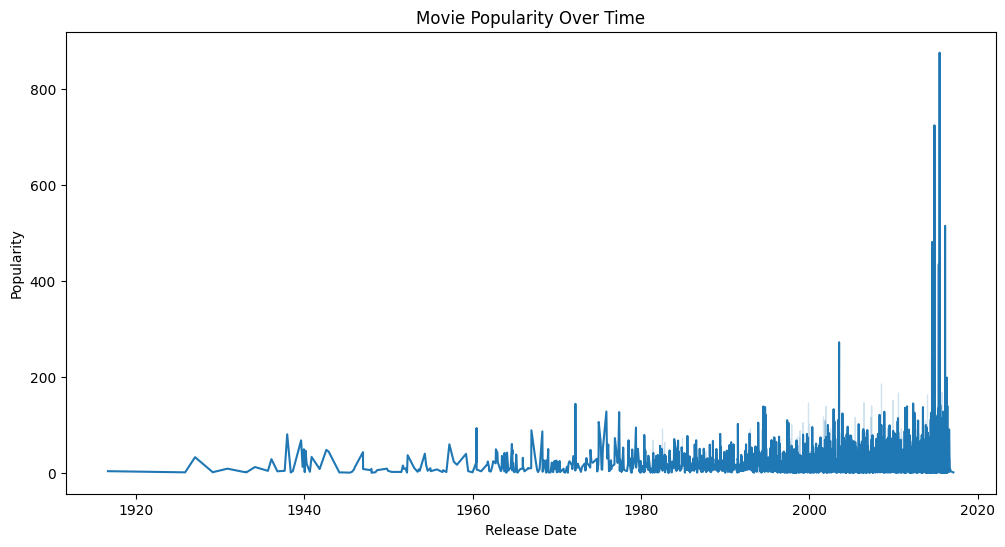

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a 'release_date' column, convert it to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'])

# Create a line plot for popularity over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='popularity', data=movies)
plt.title('Movie Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.show()


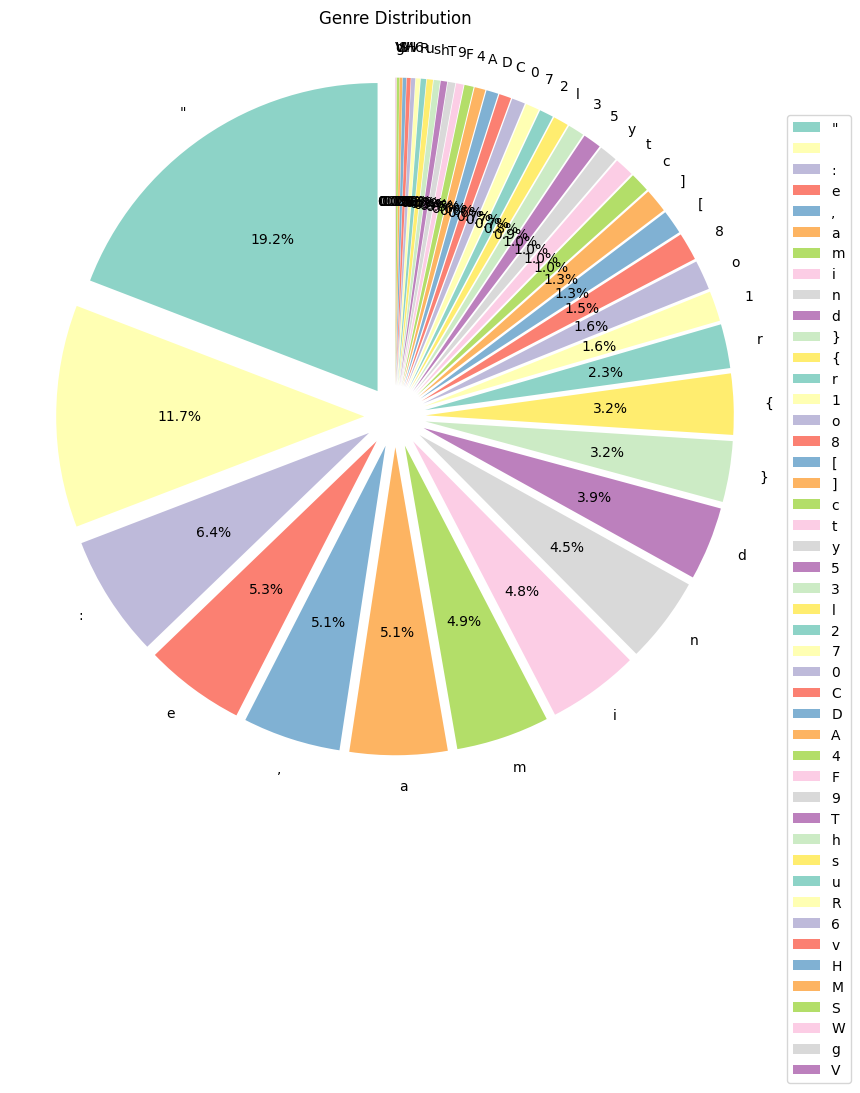

In [67]:
# Create a pie chart for genre distribution
plt.figure(figsize=(10, 10))
explode = (0.1,) * len(genres_counts)  # Adjust the explosion effect for better visibility
colors = plt.cm.Set3.colors  # Use a predefined color palette

# Plot the pie chart with labels and legend
genres_counts.plot.pie(autopct='%1.1f%%', startangle=90, explode=explode, colors=colors)
plt.title('Genre Distribution')
plt.ylabel('')  # Remove the default 'count' label on the y-axis
plt.legend(genres_counts.index, loc='upper left', bbox_to_anchor=(1, 0.9))  # Add a legend
plt.show()


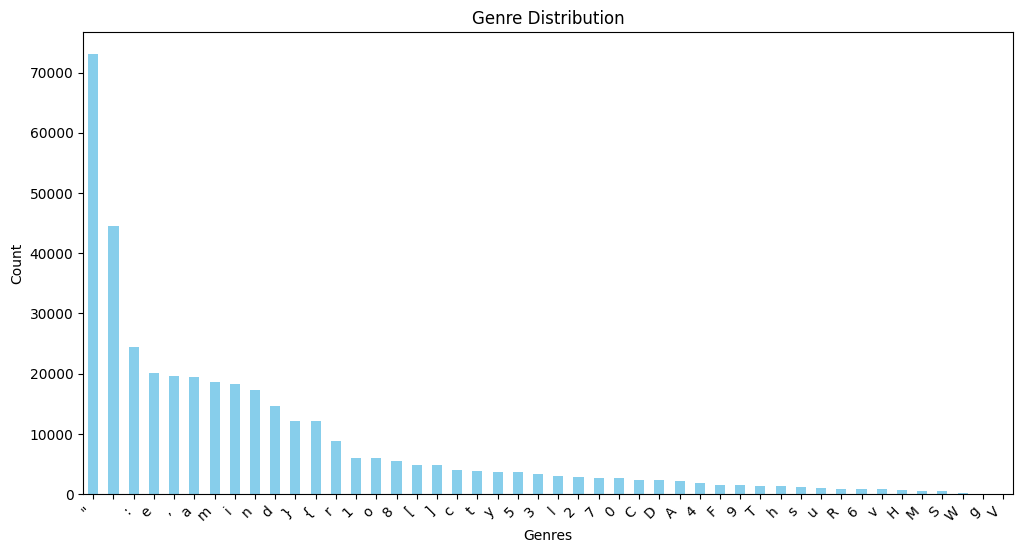

In [60]:
plt.figure(figsize=(12, 6))
genres_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\G M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\G M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


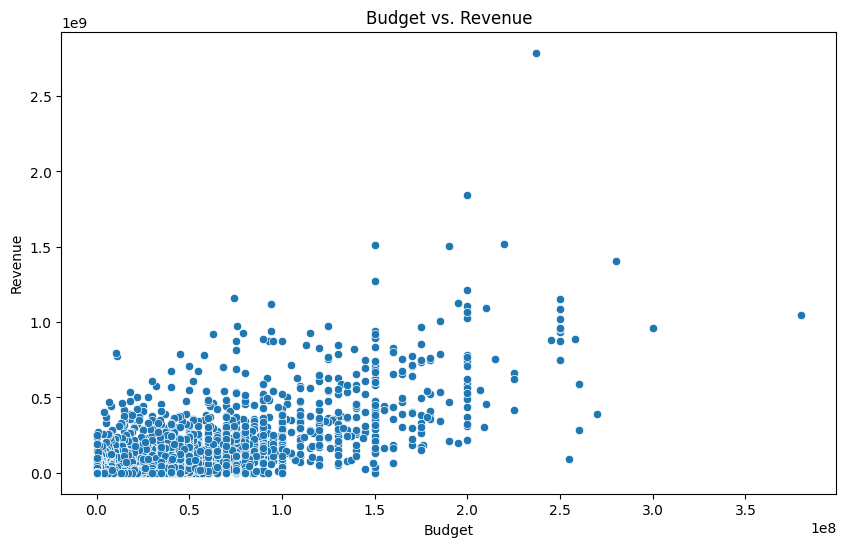

Correlation Coefficient: 0.7305843093919148


In [69]:
# Assuming you have 'budget' and 'revenue' columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=movies)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()
budget = movies['budget']
revenue = movies['revenue']

correlation_coefficient = np.corrcoef(budget, revenue)[0, 1]
print("Correlation Coefficient:", correlation_coefficient)


C:\Users\G M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\G M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


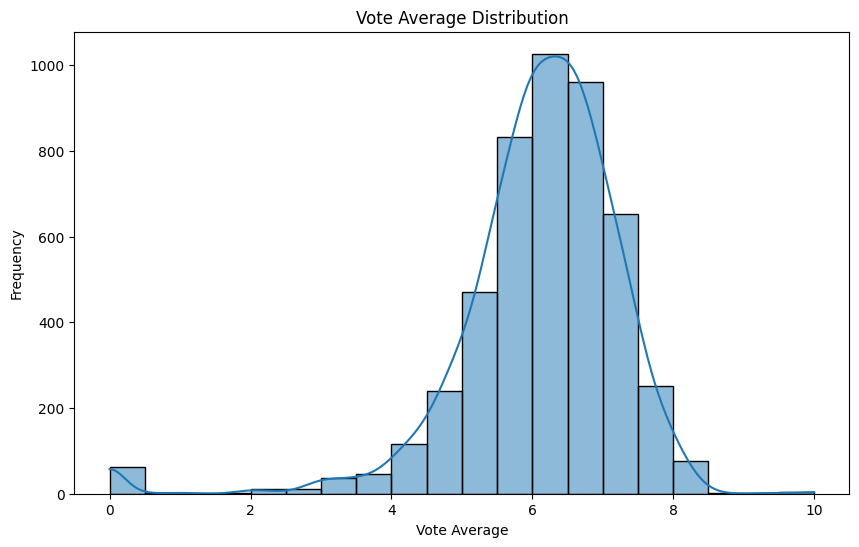

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['vote_average'], bins=20, kde=True)
plt.title('Vote Average Distribution')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()


C:\Users\G M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\G M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


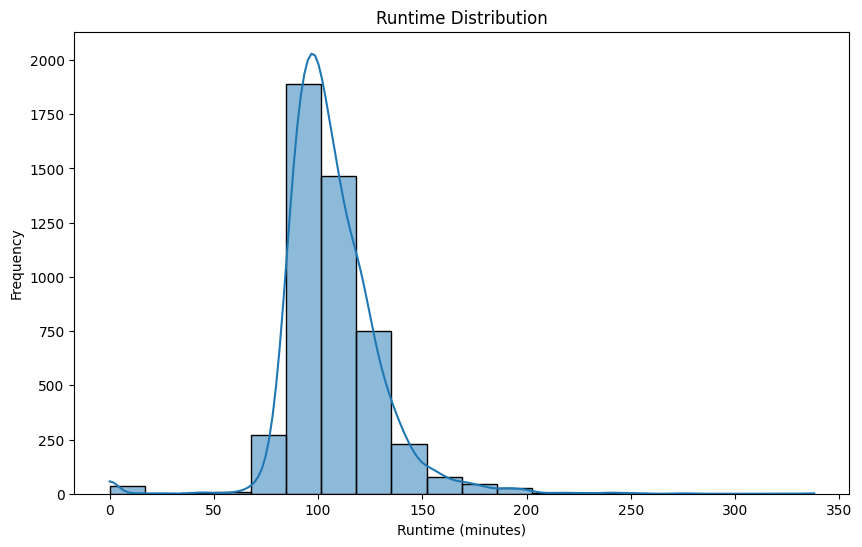

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['runtime'].dropna(), bins=20, kde=True)
plt.title('Runtime Distribution')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()


C:\Users\G M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\G M\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


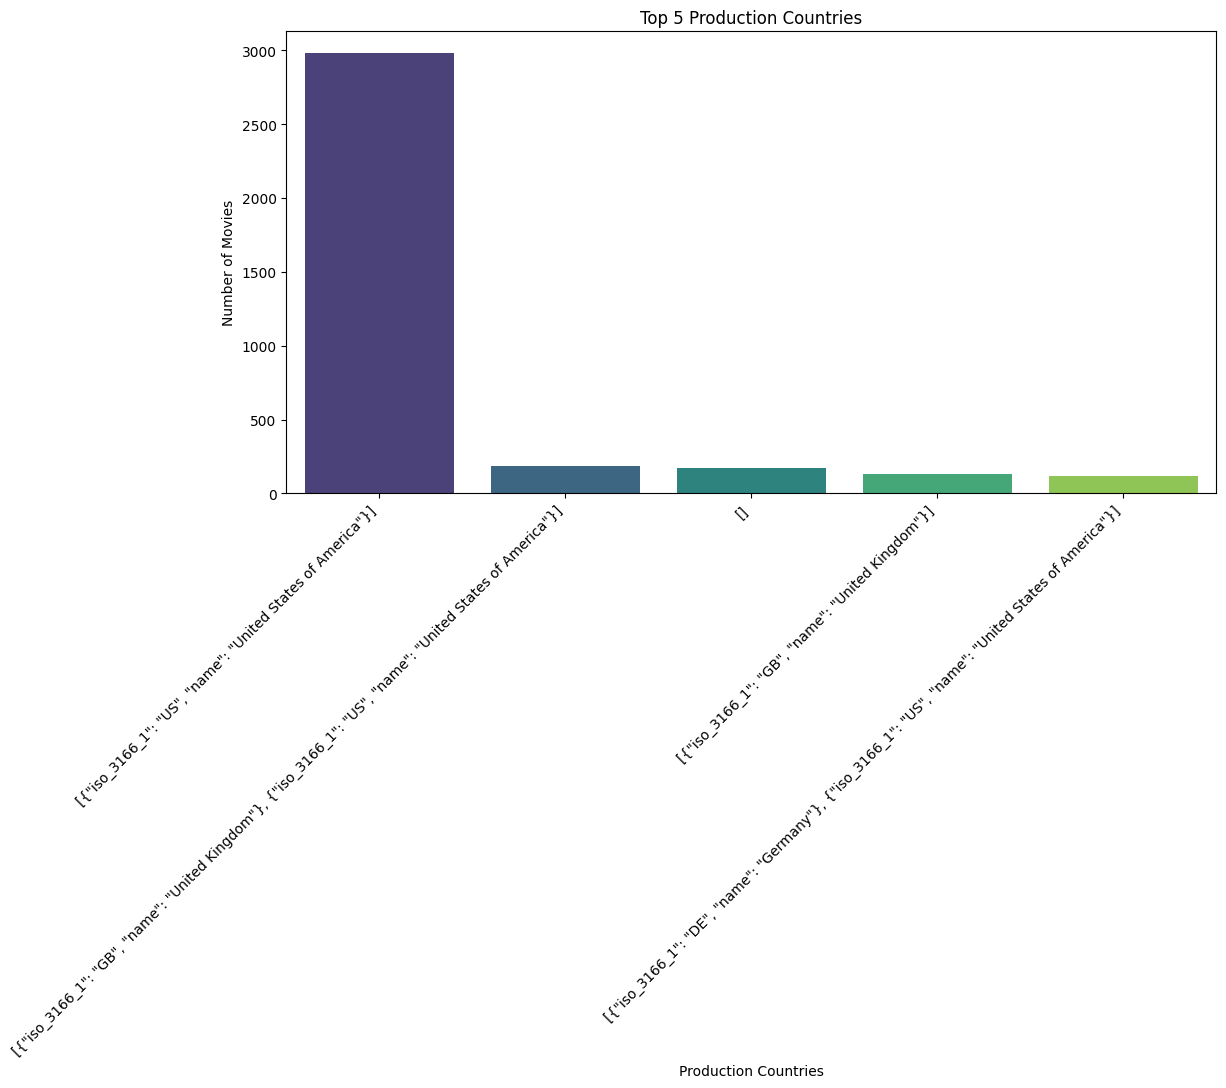

In [65]:
plt.figure(figsize=(12, 6))

# Get the top 5 production countries
top_countries = movies['production_countries'].value_counts().head(5).index

# Filter the dataset for movies produced in the top 5 countries
top_countries_movies = movies[movies['production_countries'].isin(top_countries)]

# Create a count plot
sns.countplot(x='production_countries', data=top_countries_movies, order=top_countries, palette='viridis')

# Add title and labels
plt.title('Top 5 Production Countries')
plt.xlabel('Production Countries')
plt.ylabel('Number of Movies')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


In [31]:
#preprocessing the data 
#geners
#movie_id
#keywords
#title
#overview
#cast
#crew
movies = movies[['movie_id','title', 'overview','genres','keywords','cast','crew']]

In [84]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [32]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [33]:
#dropping the null values
movies.dropna(inplace=True)

In [7]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [72]:
movies.duplicated().sum()

0

In [34]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [35]:
#'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
#[Action,Adventure,Fantasy,Science Fiction]

In [36]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [37]:
import ast
def convert(obj):
    L = []
    for i in ast.literal_eval(obj): #converting string into list
        L.append(i['name'])
    return L

In [38]:
movies['genres'] = movies['genres'].apply(convert)

In [42]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [39]:
 movies['keywords'].apply(convert)

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4804    [united states–mexico barrier, legs, arms, pap...
4805                                                   []
4806    [date, love at first sight, narration, investi...
4807                                                   []
4808            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4806, dtype: object

In [40]:
movies['keywords'] =  movies['keywords'].apply(convert)

In [41]:
import ast
def convert3(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj): #converting string into list
        if counter != 3:            #getting first three actor names from dictionary
           L.append(i['name'])
        else:
            break   
    return L

In [42]:
movies['cast'].apply(convert3)

0       [Sam Worthington, Zoe Saldana, Sigourney Weave...
1       [Johnny Depp, Orlando Bloom, Keira Knightley, ...
2       [Daniel Craig, Christoph Waltz, Léa Seydoux, R...
3       [Christian Bale, Michael Caine, Gary Oldman, A...
4       [Taylor Kitsch, Lynn Collins, Samantha Morton,...
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805    [Edward Burns, Kerry Bishé, Marsha Dietlein, C...
4806    [Eric Mabius, Kristin Booth, Crystal Lowe, Geo...
4807    [Daniel Henney, Eliza Coupe, Bill Paxton, Alan...
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldm...
Name: cast, Length: 4806, dtype: object

In [43]:
movies['cast'] = movies['cast'].apply(convert3)

In [44]:
  #preprocessing the crew column

def fetch_director(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj): #converting string into list
        if i['job']=='Director':           #getting Name when it is = Director
           L.append(i['name'])
           break   
    return L

In [45]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [155]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [46]:
movies['overview'][0]   #it is a string we have to convert it into list

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [47]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [40]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [48]:
# now we have to transform the columns so that our model do not confused in names suggestion like
# Sam Worthington
# SamWorthington

movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])

0       [Action, Adventure, Fantasy, ScienceFiction]
1                       [Adventure, Fantasy, Action]
2                         [Action, Adventure, Crime]
3                   [Action, Crime, Drama, Thriller]
4                [Action, Adventure, ScienceFiction]
                            ...                     
4804                       [Action, Crime, Thriller]
4805                               [Comedy, Romance]
4806               [Comedy, Drama, Romance, TVMovie]
4807                                              []
4808                                   [Documentary]
Name: genres, Length: 4806, dtype: object

In [49]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [165]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]


In [50]:
# now we have to create a new column named tag which will be concatination of above columns

movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [167]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [55]:
# now we do not need all columns so we will create a new data frame
new_df = movies[['movie_id','title', 'tags']]

In [90]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [56]:
# now we will conver tag which is list into string
new_df['tags'].apply(lambda x:" ".join(x))

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: tags, Length: 4806, dtype: object

In [57]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

C:\Users\G M\AppData\Local\Temp\ipykernel_20212\3089450492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))


In [93]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [54]:
new_df['tags'][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'StephenLang',
 'MichelleRodriguez',
 'GiovanniRibisi',
 'JoelDavidMoore',
 'CCHPounder',
 'WesStudi',
 'LazAlonso',
 'DileepRao',
 'MattGerald',
 'SeanAnthonyMoran',
 'JasonWhyte',
 'ScottLawrence',
 'KellyKilgour',
 'JamesPatrickPitt',
 'SeanPatrickMurphy',
 'PeterDillon',
 'KevinDorman',
 'KelsonHenderson',
 'DavidVanHorn',
 'J

In [58]:
# now it is prefered k we have to convert it into lower case
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

C:\Users\G M\AppData\Local\Temp\ipykernel_20212\2034683471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [50]:
# now it is time to vectorization means we have 5000 movies and each has a tag and we have to find to similarities first tag has what similarities in second one
#one thing is that we count the similar words but this is not a good way there fore we will use vactorization
# vector means 2D x axis and y axis each movies has a tag means in 2D we will be 5000vector and we will recommend on nearest vector basis
# we will use bag of words technique


In [59]:
#note adding in middle for stemmer
import nltk


In [60]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [62]:
def stem(text):          #functionn for stremming
    y = []

    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)     #also converting list into string

In [63]:
new_df['tags'] = new_df['tags'].apply(stem)

C:\Users\G M\AppData\Local\Temp\ipykernel_20212\3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [99]:
new_df['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver stephenlang michellerodriguez giovanniribisi joeldavidmoore cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyte scottlawrence kellykilgour jamespatrickpitt seanpatrickmurphy peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblain-rozgay joncurry lukehawker woodyschultz petermensah soniayee jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibby jodielandau julielamm cullenb.madden josephbradymadden frankietorres austinwilson sarawilson tamicawashington-miller lucybriant nathanm

In [100]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
Cv = CountVectorizer(max_features= 5000,stop_words='english')

In [102]:
#Cv.fit_transform(new_df['tags']).toarray()
#below is the updated one
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score




In [34]:
#train_data, test_data = train_test_split(new_df, test_size=0.2, random_state=42)
#Cv = CountVectorizer(max_features=5000, stop_words='english')
#Vectors = Cv.fit_transform(train_data['tags']).toarray()

In [65]:
Vectors = Cv.fit_transform(new_df['tags']).toarray()
# Abve is updated and splited into train and test data so for now consider above one 


In [66]:
Cv.get_feature_names_out()    # getting all unique words here

array(['000', '007', '10', ..., 'zoo', 'zooeydeschanel', 'zoëkravitz'],
      dtype=object)

In [ ]:
# we will apply stamming on it becuase there is some words which have similar meanings like [loved] , [love], [loving]
# Stamming will convert them into like [love], [love],[love]

In [37]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [105]:
#check Stremmer for loved loving love
# love love love
ps.stem('loving')

'love'

In [67]:
stem(
'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver stephenlang michellerodriguez giovanniribisi joeldavidmoore cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyte scottlawrence kellykilgour jamespatrickpitt seanpatrickmurphy peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblain-rozgay joncurry lukehawker woodyschultz petermensah soniayee jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibby jodielandau julielamm cullenb.madden josephbradymadden frankietorres austinwilson sarawilson tamicawashington-miller lucybriant nathanmeister gerryblair matthewchamberlain paulyates wraywilson jamesgaylyn melvinlenoclarkiii carvonfutrell brandonjelkes micahmoch hanniyahmuhammad christophernolen christaoliver aprilmariethomas bravitaa.threatt colinbleasdale mikebodnar mattclayton nicoledionne jamieharrison allanhenry anthonyingruber ashleyjeffery deanknowsley josephmika-hunt terrynotary kaipantano loganpithyou stuartpollock raja garethruck rhiansheehan t.j.storm jodietaylor aliciavela-bailey richardwhiteside nikiezambo julenerenee jamescameron')

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav stephenlang michellerodriguez giovanniribisi joeldavidmoor cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyt scottlawr kellykilgour jamespatrickpitt seanpatrickmurphi peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblain-rozgay joncurri lukehawk woodyschultz petermensah soniaye jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibbi jodielandau julielamm cullenb.madden josephbradymadden frankietorr austinwilson sarawilson tamicawashington-mil lucybri nathanmeist gerryblair matthewchamberlain paulyat wraywil

In [92]:
# see above text it has stremmed all words

In [36]:
#now we have vectors and almost there are 4806 movies and thus we have 4806 dimensions and now our task is to calculate each movies
# distance to other mvies (we will find cosine angel between theta b/w two vector

In [68]:
from sklearn.metrics.pairwise import cosine_similarity

In [69]:
cosine_similarity(Vectors)  #IT has calculated all 4806 movies similarities

array([[1.        , 0.06818182, 0.07644708, ..., 0.04307305, 0.        ,
        0.        ],
       [0.06818182, 1.        , 0.07644708, ..., 0.02153652, 0.        ,
        0.02383656],
       [0.07644708, 0.07644708, 1.        , ..., 0.02414726, 0.        ,
        0.        ],
       ...,
       [0.04307305, 0.02153652, 0.02414726, ..., 1.        , 0.04307305,
        0.0451754 ],
       [0.        , 0.        , 0.        , ..., 0.04307305, 1.        ,
        0.09534626],
       [0.        , 0.02383656, 0.        , ..., 0.0451754 , 0.09534626,
        1.        ]])

In [70]:
similarity = cosine_similarity(Vectors)

In [71]:
similarity[1]  # similarities of first movies with others

array([0.06818182, 1.        , 0.07644708, ..., 0.02153652, 0.        ,
       0.02383656])

In [72]:
# now we will define a function which will take input movies and give us 5 movies on similarities in this function we will se inputs index first then we 
# will check similarities 
#def recommend(movie):
    #movie_index = new_df[new_df['title'] == movie].index[0]   # getting the index of movies
    #distances = similarity[movie_index]                        # getting the distances nd now i have to sort the distances so that i recommend top 5
    #movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]   #here we sort the distances and enumerate gives with index 
                                                                                            #and return top 5 similar movies
    #for i in movies_list:   # printing these similar movies 
        #print(new_df.iloc[i[0]].title)
    
    
    #return
 # now we will define a function which will take input movies and give us 5 movies on similarities in this function we will se inputs index first then we 
# will check similarities 
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]   # getting the index of movies
    distances = similarity[movie_index]                        # getting the distances nd now i have to sort the distances so that i recommend top 5
    movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]   #here we sort the distances and enumerate gives with index 
                                                                                            #and return top 5 similar movies
    for i in movies_list:   # printing these similar movies 
        print(new_df.iloc[i[0]].title)
    
    
    return
   




In [74]:
recommend('Spider-Man')    # BOOOM Here we go


Spider-Man 3
Spider-Man 2
The Amazing Spider-Man 2
Arachnophobia
The Amazing Spider-Man


In [77]:
recommend('Avatar')

Aliens vs Predator: Requiem
Battle: Los Angeles
Predator
Falcon Rising
Independence Day


In [49]:
# we have build the model now we will convert it into website

In [50]:
import pickle   # by the help of this we will use this model to PyCharm

In [51]:
pickle.dump(new_df.to_dict(),open('movie_dict.pkl','wb'))

In [54]:
pickle.dump(similarity,open('similarity.pkl','wb'))